In [1]:
import floater
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from floater import rclv
from matplotlib.colors import LogNorm

from dask.diagnostics import ProgressBar

In [2]:
from skimage.feature import peak_local_max


In [3]:
plt.rcParams.update({'font.size': 18
    , 'legend.markerscale': 1., 'axes.titlesize': 20, 'axes.labelsize' : 20,
      'legend.fontsize' : 16,'legend.handlelength': 3})

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

lw=2
aph=.2

plt.rcParams['figure.figsize'] = (10.,8.)


In [4]:
codelist = ['100_3Dh', '100_2Dh', '100_3Dd', '100_2Dd',  '100_3Dw', '100_2Dw' ]
figdir = 'Figs_FTLE_LAVD_Depth_100particlegrid/'

In [5]:
indir = '/rigel/ocp/users/as4479/float_traj/'

In [6]:
lavd_h = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[1]).lavd.sel(x0=slice(3,7), y0=slice(-35, -31)).fillna(0).to_dataset(name='lavd_h')
lavd_d = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[3]).lavd.sel(x0=slice(3,7), y0=slice(-35, -31)).fillna(0).to_dataset(name='lavd_d')
lavd_w = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[5]).lavd.sel(x0=slice(3,7), y0=slice(-35, -31)).fillna(0).to_dataset(name='lavd_w')


lavd1 = xr.merge([lavd_h,lavd_d,lavd_w])
lavd1 

<xarray.Dataset>
Dimensions:   (duration: 3, x0: 400, y0: 400)
Coordinates:
  * y0        (y0) float32 -34.995 -34.985 -34.975 -34.965 -34.955 -34.945 ...
  * x0        (x0) float32 3.005 3.015 3.025 3.035 3.045 3.055 3.065 3.075 ...
  * duration  (duration) int64 15 30 60
Data variables:
    lavd_h    (duration, y0, x0) float64 1.577e-05 2.294e-05 2.361e-05 ...
    lavd_d    (duration, y0, x0) float64 1.858e-05 1.279e-05 2.796e-05 ...
    lavd_w    (duration, y0, x0) float64 4.416e-06 4.461e-06 4.542e-06 ...

In [7]:
sampling = ['h', 'd', 'w']
lavd = xr.concat([lavd1['lavd_%s' %sam] for sam in sampling], dim=xr.Variable('sampling', sampling)).to_dataset(name='lavd')

In [8]:
lavd

<xarray.Dataset>
Dimensions:   (duration: 3, sampling: 3, x0: 400, y0: 400)
Coordinates:
  * y0        (y0) float32 -34.995 -34.985 -34.975 -34.965 -34.955 -34.945 ...
  * x0        (x0) float32 3.005 3.015 3.025 3.035 3.045 3.055 3.065 3.075 ...
  * duration  (duration) int64 15 30 60
  * sampling  (sampling) <U1 'h' 'd' 'w'
Data variables:
    lavd      (sampling, duration, y0, x0) float64 1.577e-05 2.294e-05 ...

In [9]:
res=[[list(),list(),list(),list(),list()],
    [list(),list(),list(),list(),list()],
    [list(),list(),list(),list(),list()]]
plm=[[list(),list(),list(),list(),list()],
    [list(),list(),list(),list(),list()],
    [list(),list(),list(),list(),list()]]


sam = ['h','d','w']
dur = [15 ,30, 60]

cd_val=np.array([0.25,0.1,0.05,0.01,0.001])

md = 120
ma = 200.

sm = sam[2]
    
    
for j, dr in enumerate(dur):
    print(j, 'duration=', dr)
    
    data = lavd.lavd.sel(sampling=sm, duration = dr)
    raw = data.data
    
    for i, cd in enumerate(cd_val):
        print(i, 'CD=' ,cd)
        
            

        plm[j][i] = peak_local_max(raw, min_distance=md)
        res[j][i] = list(rclv.find_convex_contours(raw, convex_def=cd, min_distance=md, min_area=ma, progress=True))
    

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

0 duration= 15
0 CD= 0.25
1 CD= 0.1
2 CD= 0.05
3 CD= 0.01
4 CD= 0.001
1 duration= 30
0 CD= 0.25


  0%|          | 0/1 [00:00<?, ?it/s]

1 CD= 0.1


  0%|          | 0/1 [00:00<?, ?it/s]

2 CD= 0.05


  0%|          | 0/1 [00:00<?, ?it/s]

3 CD= 0.01
4 CD= 0.001
2 duration= 60
0 CD= 0.25


  0%|          | 0/1 [00:00<?, ?it/s]

1 CD= 0.1
2 CD= 0.05
3 CD= 0.01


100%|██████████| 1/1 [00:00<00:00, 389.73it/s]

4 CD= 0.001


/rigel/ocp/users/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


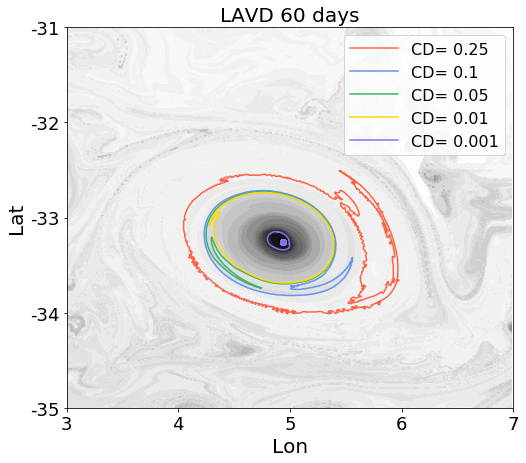

In [10]:
plt.figure(figsize=(8,7))
plt.contourf(lavd.lavd.sel(sampling=sam[2], duration = dur[2]).data, 30, rasterized=True)
plt.set_cmap('Greys')
plt.plot(plm[2][2][:, 1], plm[2][2][:, 0], 'co')
colors = [color1,color2,color3,color4,color5,color6]

for j, clr in zip(range(5), colors):
    for (ji, con, area, cd) in res[2][j]:
        plt.plot(ji[1], ji[0], color = clr,  marker='o')
        plt.plot(con[:, 1], con[:, 0], color = clr,  linestyle='solid', label='CD= %s' %cd_val[j], rasterized=True)
plt.legend()

plt.xticks(np.linspace(0,lavd.x0.data.shape[0],5),[3,4,5,6,7])
plt.yticks(np.linspace(0,lavd.y0.data.shape[0],5),[-35,-34,-33,-32,-31])

plt.xlabel('Lon')
plt.ylabel('Lat')

plt.title('LAVD 60 days')
plt.savefig(figdir+'CD_contours_60day.pdf', dpi=200)

In [9]:
lavd_2D_h = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[1]).lavd.fillna(0).to_dataset(name='lavd_2D_h')
lavd_2D_d = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[3]).lavd.fillna(0).to_dataset(name='lavd_2D_d')
lavd_2D_w = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[5]).lavd.fillna(0).to_dataset(name='lavd_2D_w')

lavd_3D_h = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[0]).lavd.fillna(0).to_dataset(name='lavd_3D_h')
lavd_3D_d = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[2]).lavd.fillna(0).to_dataset(name='lavd_3D_d')
lavd_3D_w = xr.open_dataset(indir+'FTLE_LAVD_Depth_%s.nc'%codelist[4]).lavd.fillna(0).to_dataset(name='lavd_3D_w')

lavd1 = xr.merge([lavd_3D_h,lavd_3D_d,lavd_3D_w,lavd_2D_h,lavd_2D_d,lavd_2D_w])
lavd1 

<xarray.Dataset>
Dimensions:    (duration: 3, x0: 4450, y0: 2900)
Coordinates:
  * y0         (y0) float32 -55.995 -55.985 -55.975 -55.965 -55.955 -55.945 ...
  * x0         (x0) float32 -15.495 -15.485 -15.475 -15.465 -15.455 -15.445 ...
  * duration   (duration) int64 15 30 60
Data variables:
    lavd_3D_h  (duration, y0, x0) float64 1.441e-05 1.198e-05 1.087e-05 ...
    lavd_3D_d  (duration, y0, x0) float64 1.572e-05 1.478e-05 9.243e-06 ...
    lavd_3D_w  (duration, y0, x0) float64 9.723e-06 9.832e-06 9.758e-06 ...
    lavd_2D_h  (duration, y0, x0) float64 1.564e-05 1.217e-05 1.136e-05 ...
    lavd_2D_d  (duration, y0, x0) float64 1.596e-05 1.46e-05 9.29e-06 ...
    lavd_2D_w  (duration, y0, x0) float64 9.837e-06 9.852e-06 9.744e-06 ...

In [10]:
sampling = ['h', 'd', 'w']
particle=['2D', '3D']


lavd = xr.concat([xr.concat([lavd1['lavd_%s_%s' %(part, sam)] for part in particle], 
                            dim=xr.Variable('particle', particle)) for sam in sampling], 
                 dim=xr.Variable('sampling', sampling)).to_dataset(name='lavd')

In [11]:
lavd

<xarray.Dataset>
Dimensions:   (duration: 3, particle: 2, sampling: 3, x0: 4450, y0: 2900)
Coordinates:
  * y0        (y0) float32 -55.995 -55.985 -55.975 -55.965 -55.955 -55.945 ...
  * x0        (x0) float32 -15.495 -15.485 -15.475 -15.465 -15.455 -15.445 ...
  * duration  (duration) int64 15 30 60
  * particle  (particle) <U2 '2D' '3D'
  * sampling  (sampling) <U1 'h' 'd' 'w'
Data variables:
    lavd      (sampling, particle, duration, y0, x0) float64 1.564e-05 ...

In [12]:
# Detect RCLVS for three different CD s # 
#data = lavd.lavd.sel(sampling='w', particle='2D', duration = 60) 


# For convenience I am just doing it for a small region here
data = lavd.lavd.sel(x0=slice(-4,11), y0=slice(-39,-28), sampling='w', particle='2D', duration = 60) 

# Use the case where you are most likely to detect large, long-lived RCLVS, 
# for this case the 2D weekly at 60 days

raw = data.data

md = 120
cd = [0.25,0.1,0.01,0.001]
ma = 200.

rclvs1 = list(rclv.find_convex_contours(raw, convex_def=cd[0], min_distance=md, min_area=ma, progress=True))
rclvs2 = list(rclv.find_convex_contours(raw, convex_def=cd[1], min_distance=md, min_area=ma, progress=True))
rclvs3 = list(rclv.find_convex_contours(raw, convex_def=cd[2], min_distance=md, min_area=ma, progress=True))
rclvs4 = list(rclv.find_convex_contours(raw, convex_def=cd[3], min_distance=md, min_area=ma, progress=True))

100%|██████████| 12/12 [00:00<00:00, 239.70it/s]


In [14]:
# load the big dataset


code = codelist[5]     

indir = '/rigel/ocp/users/as4479/float_traj/%s/float_trajectories_netcdf/'%code
ds = xr.open_mfdataset(indir+'*.nc')

# Just take the small region, as in the previous cell
ds = ds.sel(x0=slice(-4,11), y0=slice(-39,-28))

In [15]:
# Create labels for the RCLVs in the big data set#

all_contours1 = [r[1] for r in rclvs1]
labels1 = rclv.label_points_in_contours(data.shape, all_contours1)

ds['labels1'] = xr.DataArray(labels1, dims=data.dims, coords=data.coords)
ds['labels1'] = ds['labels1'].where(ds['labels1'])

all_contours2 = [r[1] for r in rclvs2]
labels2 = rclv.label_points_in_contours(data.shape, all_contours2)

ds['labels2'] = xr.DataArray(labels2, dims=data.dims, coords=data.coords)
ds['labels2'] = ds['labels2'].where(ds['labels2'])

all_contours3 = [r[1] for r in rclvs3]
labels3 = rclv.label_points_in_contours(data.shape, all_contours3)

ds['labels3'] = xr.DataArray(labels3, dims=data.dims, coords=data.coords)
ds['labels3'] = ds['labels3'].where(ds['labels3'])

all_contours4 = [r[1] for r in rclvs4]
labels4 = rclv.label_points_in_contours(data.shape, all_contours4)

ds['labels4'] = xr.DataArray(labels4, dims=data.dims, coords=data.coords)
ds['labels4'] = ds['labels4'].where(ds['labels4'])

ds

<xarray.Dataset>
Dimensions:   (time: 133, x0: 1500, y0: 1100)
Coordinates:
  * y0        (y0) float32 -38.995 -38.985 -38.975 -38.965 -38.955 -38.945 ...
  * x0        (x0) float32 -3.995 -3.985 -3.975 -3.965 -3.955 -3.945 -3.935 ...
  * time      (time) int64 0 43200 86400 129600 172800 216000 259200 302400 ...
    duration  int64 60
    particle  <U2 '2D'
    sampling  <U1 'w'
Data variables:
    x         (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
    y         (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
    z         (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
    u         (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
    v         (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
    vort      (time, y0, x0) float32 dask.array<shape=(133, 1100, 1500), chunksize=(1, 1100, 1500)>
 

/rigel/ocp/users/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


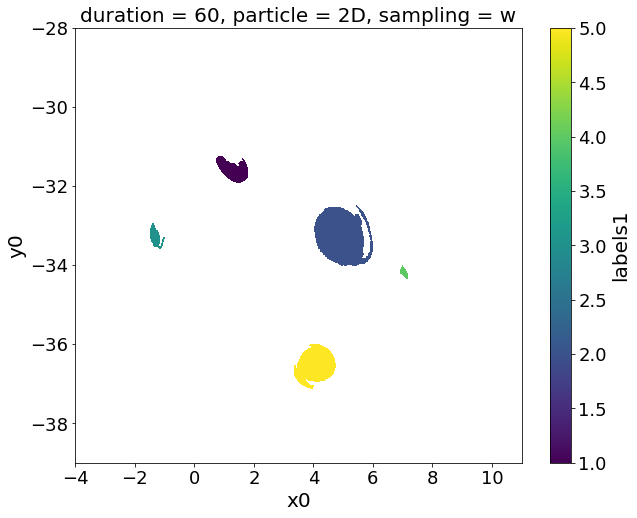

In [16]:
ds.labels1.plot()

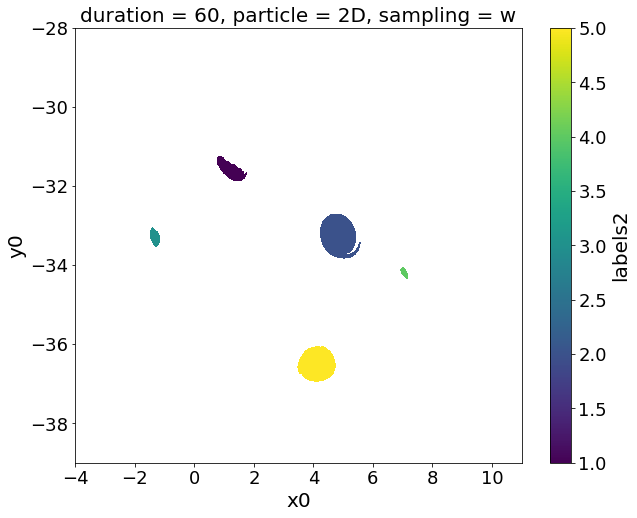

In [17]:
ds.labels2.plot()

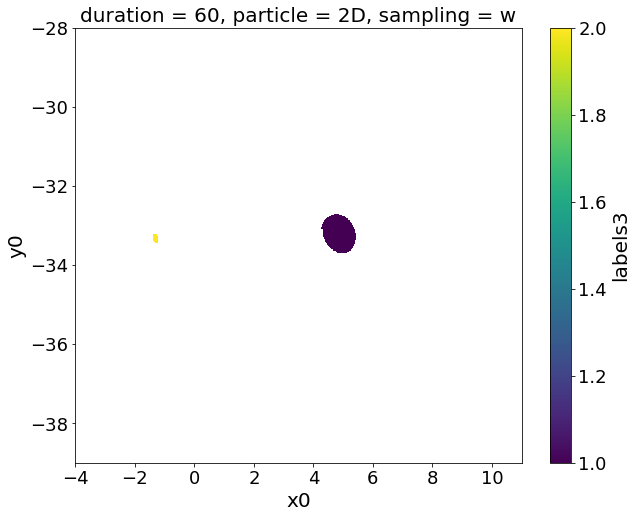

In [18]:
ds.labels3.plot()

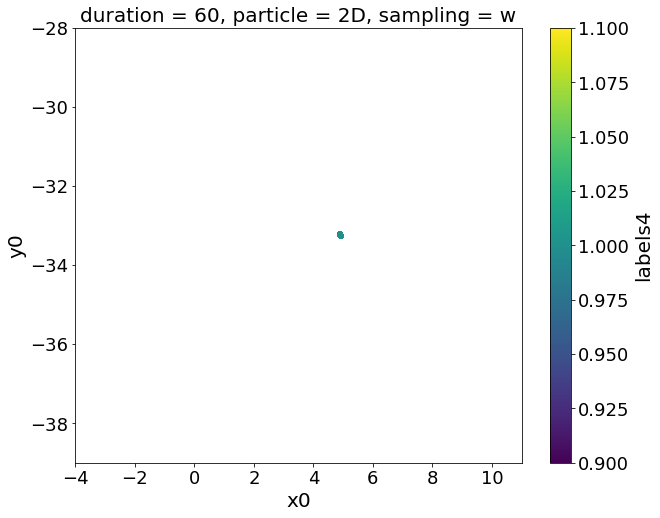

In [19]:
ds.labels4.plot()

Text(0.5,1,'CD=0.1')

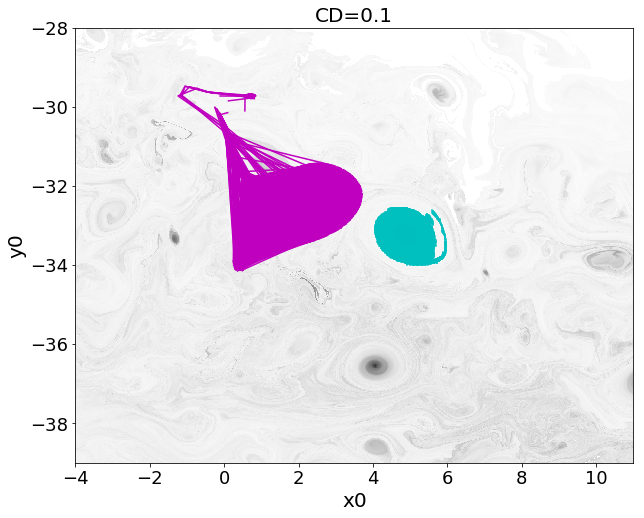

In [23]:
eddy_1 = ds.where(ds.labels1==2, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_colorbar=False)

plt.plot(eddy_init.x, eddy_init.y, color='c', );
plt.plot(eddy_fin.x, eddy_fin.y, color='m', );
plt.title('CD=0.1')

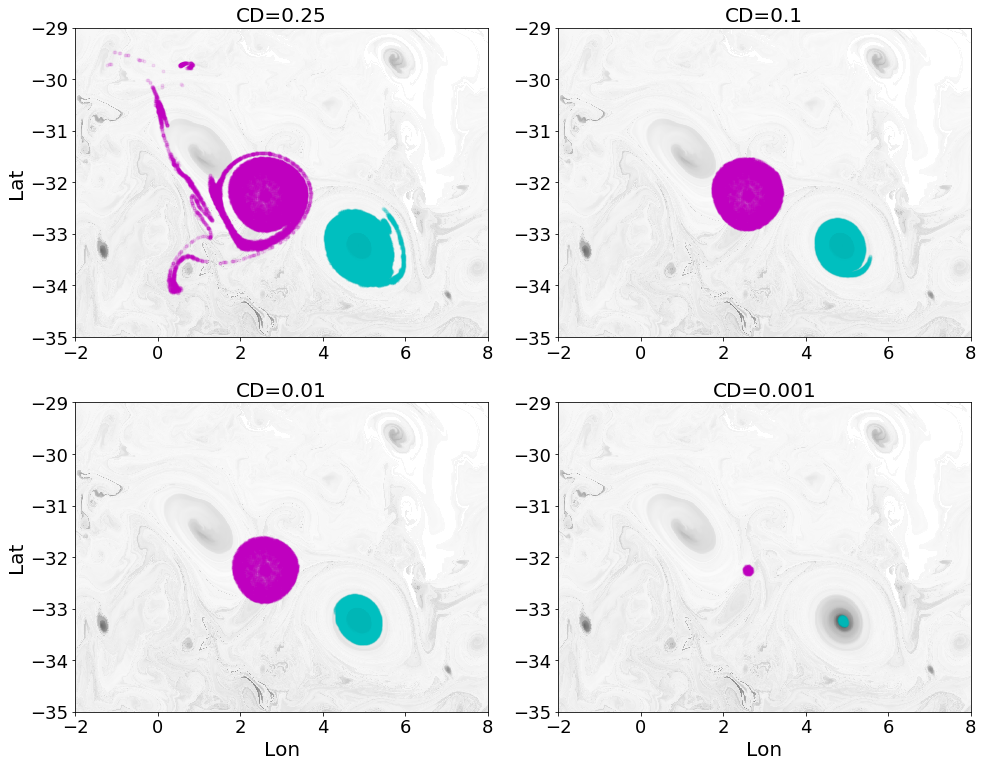

In [20]:
plot_dict = dict(marker='.', linestyle='none', alpha=0.1)
xlim=(-2, 8) 
ylim=(-35, -29)

fig=plt.figure(figsize=(14,11))

plt.subplot(221)

eddy_1 = ds.where(ds.labels1==2, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.25')
plt.xlim(xlim);
plt.ylim(ylim);
#plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(222)

eddy_1 = ds.where(ds.labels2==2, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5 ,add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.1')

plt.xlim(xlim);
plt.ylim(ylim);
#plt.xlabel('Lon')
#plt.ylabel('Lat')

plt.subplot(223)

eddy_1 = ds.where(ds.labels3==1, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.01')

plt.xlim(xlim);
plt.ylim(ylim);
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(224)

eddy_1 = ds.where(ds.labels4==1, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.001')

plt.xlim(xlim);
plt.ylim(ylim);
plt.xlabel('Lon')
#plt.ylabel('Lat')

plt.tight_layout()

fig.savefig(figdir+'Eddy1_4different_CD_100dpi.pdf', dpi=100)
fig.savefig(figdir+'Eddy1_4different_CD.png')


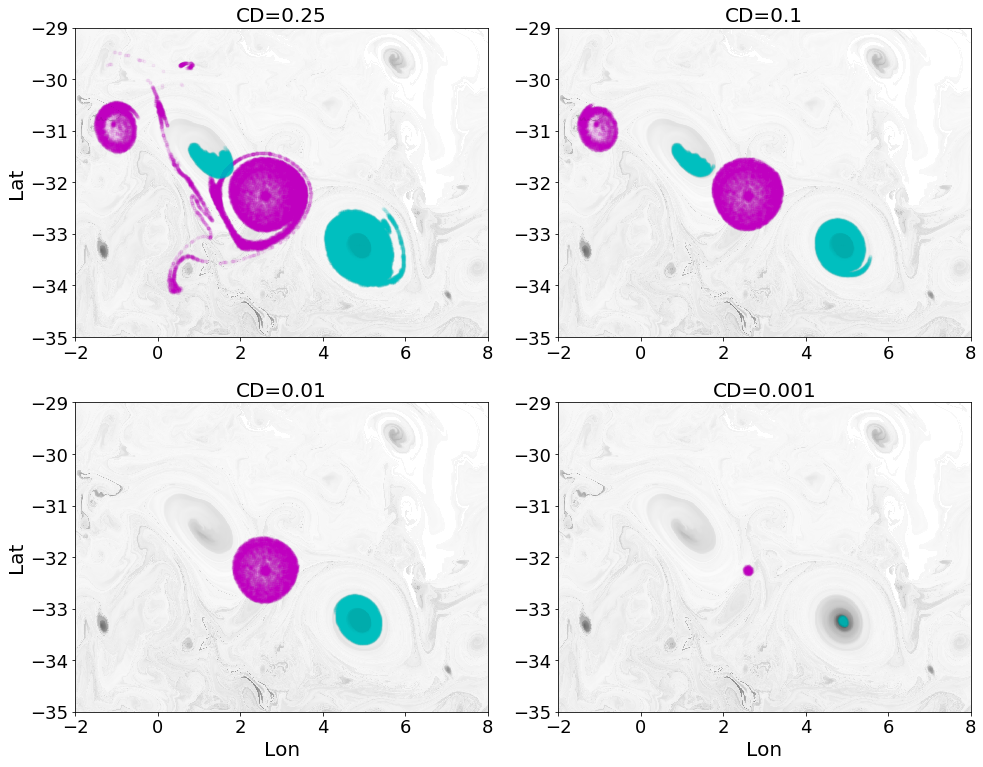

In [21]:
plot_dict = dict(marker='.', linestyle='none', alpha=0.05)
xlim=(-2, 8) 
ylim=(-35, -29)

fig=plt.figure(figsize=(14,11))

plt.subplot(221)

eddy_1 = ds.where(ds.labels1==2, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

eddy_2 = ds.where(ds.labels1==1, drop=True)
eddy2_init = eddy_2.isel(time=0)
eddy2_fin = eddy_2.isel(time=120)


data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.plot(eddy2_init.x, eddy2_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy2_fin.x, eddy2_fin.y, color='m', **plot_dict, rasterized=True);

plt.title('CD=0.25')
plt.xlim(xlim);
plt.ylim(ylim);
#plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(222)

eddy_1 = ds.where(ds.labels2==2, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

eddy_2 = ds.where(ds.labels2==1, drop=True)
eddy2_init = eddy_2.isel(time=0)
eddy2_fin = eddy_2.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5 ,add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.plot(eddy2_init.x, eddy2_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy2_fin.x, eddy2_fin.y, color='m', **plot_dict, rasterized=True);

plt.title('CD=0.1')

plt.xlim(xlim);
plt.ylim(ylim);
#plt.xlabel('Lon')
#plt.ylabel('Lat')

plt.subplot(223)

eddy_1 = ds.where(ds.labels3==1, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.01')

plt.xlim(xlim);
plt.ylim(ylim);
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(224)

eddy_1 = ds.where(ds.labels4==1, drop=True)
eddy_init = eddy_1.isel(time=0)
eddy_fin = eddy_1.isel(time=120)

data.plot(cmap='Greys', vmax=4e-5, add_labels=False, add_colorbar=False, rasterized=True)

plt.plot(eddy_init.x, eddy_init.y, color='c', **plot_dict, rasterized=True);
plt.plot(eddy_fin.x, eddy_fin.y, color='m', **plot_dict, rasterized=True);
plt.title('CD=0.001')

plt.xlim(xlim);
plt.ylim(ylim);
plt.xlabel('Lon')
#plt.ylabel('Lat')

plt.tight_layout()

#fig.savefig(figdir+'Eddy1_4different_CD_150dpi.pdf', dpi=150)